In [3]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

In [4]:
def plot_boxplot(df_path):
    df_boxplot = pd.read_csv(df_path,
                            index_col=0
                            )
    fig, axes = plt.subplots(1, 3, figsize=(35, 8), sharey=True)

    sns.boxplot(ax=axes[0], data=df_boxplot, orient="v", palette="Set2", showfliers=False, x='Method', y='Spearman CC')
    axes[0].set_title("Spearman CC")

    sns.boxplot(ax=axes[1], data=df_boxplot, orient="v", palette="Set2", showfliers=False, x='Method', y='Pearson CC')
    axes[1].set_title("Pearson CC")

    sns.boxplot(ax=axes[2], data=df_boxplot, orient="v", palette="Set2", showfliers=False, x='Method', y='Kendall Tau')
    axes[2].set_title("Kendall Tau")

    plt.suptitle("Correlations", fontsize=16)

In [5]:
def table_correlation(df):
    data_dict = {}
    methods = np.unique(df['Method'].values)
    for method in methods:
        data_dict[method] = list(df[df.Method==method].mean())
    results_corr = pd.DataFrame.from_dict(data_dict, orient='index', columns=['Spearman CC', 'Pearson CC', 'Kendal Tau CC'])
    return results_corr

# 1. Gaussian Experiments (100 leaves, 10 trees, $\sigma^2=2$)

## 1.a.  Comparison of the posterior predictive densities of internal nodes

### 1.a.i MSE / MAE (L2/L1 error) for the mean estimate on feature space

***No fitness***

In [56]:
df_mse = pd.read_csv("/home/eecs/khalil.ouardini/Cassiopeia_Transcriptome/scvi/results/gaussian/100/no_fitness/MSE")

print('Mean Squared error')
df_mse.describe().iloc[1:3].drop(['Unnamed: 0'], axis=1)

Mean Squared error


,average,gaussian VAE,gaussian treeVAE
mean,0.743919,2.259398,0.577865
std,0.050826,0.153466,0.077813


In [57]:
df_l1 = pd.read_csv("/home/eecs/khalil.ouardini/Cassiopeia_Transcriptome/scvi/results/gaussian/100/no_fitness/L1")

print('L1 error')
df_l1.describe().iloc[1:3].drop(['Unnamed: 0'], axis=1)

L1 error


,average,gaussian VAE,gaussian treeVAE
mean,67.116387,114.547333,56.787645
std,11.600948,22.019709,24.557797


*** Low Fitness ***

In [58]:
df_mse = pd.read_csv("/home/eecs/khalil.ouardini/Cassiopeia_Transcriptome/scvi/results/gaussian/100/low_fitness/MSE")

print('Mean Squared Error')
df_mse.describe().iloc[1:3].drop(['Unnamed: 0'], axis=1)

Mean Squared Error


,average,gaussian VAE,gaussian treeVAE
mean,0.769504,2.255553,0.601306
std,0.025203,0.071598,0.211870


In [59]:
df_l1 = pd.read_csv("/home/eecs/khalil.ouardini/Cassiopeia_Transcriptome/scvi/results/gaussian/100/low_fitness/L1")

print('L1 error')
df_l1.describe().iloc[1:3].drop(['Unnamed: 0'], axis=1)

L1 error


,average,gaussian VAE,gaussian treeVAE
mean,69.60795,112.938597,60.068534
std,12.50101,29.312670,24.863179


***High Fitness***

In [61]:
df_mse = pd.read_csv("/home/eecs/khalil.ouardini/Cassiopeia_Transcriptome/scvi/results/gaussian/100/high_fitness/MSE")

print('Mean Squared error')
df_mse.describe().iloc[1:3].drop(['Unnamed: 0'], axis=1)

Mean Squared error


,average,gaussian VAE,gaussian treeVAE
mean,0.744543,2.275629,0.601056
std,0.064456,0.135267,0.096052


In [62]:
df_l1 = pd.read_csv("/home/eecs/khalil.ouardini/Cassiopeia_Transcriptome/scvi/results/gaussian/100/high_fitness/L1")

print('L1 error')
df_l1.describe().iloc[1:3].drop(['Unnamed: 0'], axis=1)

L1 error


,average,gaussian VAE,gaussian treeVAE
mean,67.205546,111.703020,64.281118
std,7.527342,17.647059,13.404929


### 1.a.ii. Correlations (Pearson / Spearman / Kendall) across genes or across internal nodes for all methods

***No fitness***

In [63]:
# data frame
df = pd.read_csv('/home/eecs/khalil.ouardini/Cassiopeia_Transcriptome/scvi/results/gaussian/100/no_fitness/correlations_gg')
df_corr = table_correlation(df.iloc[1:].drop(['Unnamed: 0'], axis=1))

print('Sample-Sample correlations')
print(df_corr)
print('\n')

df = pd.read_csv('/home/eecs/khalil.ouardini/Cassiopeia_Transcriptome/scvi/results/gaussian/100/no_fitness/correlations_ss')
df_corr = table_correlation(df.iloc[1:].drop(['Unnamed: 0'], axis=1))

print('Gene-Gene correlations')
print(df_corr)

Sample-Sample correlations
                  Spearman CC  Pearson CC  Kendal Tau CC
average              0.948977    0.956412       0.826737
gaussian VAE         0.875452    0.883977       0.714345
gaussian treeVAE     0.964081    0.970131       0.856432


Gene-Gene correlations
                  Spearman CC  Pearson CC  Kendal Tau CC
average              0.823180    0.845237       0.652987
gaussian VAE         0.698339    0.713745       0.524306
gaussian treeVAE     0.852329    0.876805       0.693550


***Low fitness***

In [64]:
# data frame
df = pd.read_csv('/home/eecs/khalil.ouardini/Cassiopeia_Transcriptome/scvi/results/gaussian/100/low_fitness/correlations_gg')
df_corr = table_correlation(df.iloc[1:].drop(['Unnamed: 0'], axis=1))

print('Sample-Sample correlations')
print(df_corr)
print('\n')

df = pd.read_csv('/home/eecs/khalil.ouardini/Cassiopeia_Transcriptome/scvi/results/gaussian/100/low_fitness/correlations_ss')
df_corr = table_correlation(df.iloc[1:].drop(['Unnamed: 0'], axis=1))

print('Gene-Gene correlations')
print(df_corr)

Sample-Sample correlations
                  Spearman CC  Pearson CC  Kendal Tau CC
average              0.939951    0.948204       0.810953
gaussian VAE         0.854155    0.862510       0.690162
gaussian treeVAE     0.958867    0.965108       0.844841


Gene-Gene correlations
                  Spearman CC  Pearson CC  Kendal Tau CC
average              0.819665    0.844430       0.649684
gaussian VAE         0.693263    0.713459       0.518883
gaussian treeVAE     0.855432    0.881449       0.695960


***High Fitness***

In [65]:
# data frame
df = pd.read_csv('/home/eecs/khalil.ouardini/Cassiopeia_Transcriptome/scvi/results/gaussian/100/high_fitness/correlations_gg')
df_corr = table_correlation(df.iloc[1:].drop(['Unnamed: 0'], axis=1))

print('Sample-Sample correlations')
print(df_corr)
print('\n')

df = pd.read_csv('/home/eecs/khalil.ouardini/Cassiopeia_Transcriptome/scvi/results/gaussian/100/high_fitness/correlations_ss')
df_corr = table_correlation(df.iloc[1:].drop(['Unnamed: 0'], axis=1))

print('Gene-Gene correlations')
print(df_corr)

Sample-Sample correlations
                  Spearman CC  Pearson CC  Kendal Tau CC
average              0.950587    0.957575       0.827076
gaussian VAE         0.873420    0.881839       0.710289
gaussian treeVAE     0.965541    0.971050       0.856873


Gene-Gene correlations
                  Spearman CC  Pearson CC  Kendal Tau CC
average              0.790840    0.820248       0.621211
gaussian VAE         0.655291    0.679050       0.486700
gaussian treeVAE     0.820028    0.855102       0.659810


### 1.a.iii MSE/MAE (L2/L1 error) for the variance estimate on the *latent space*

In [66]:
df_var = pd.read_csv('/home/eecs/khalil.ouardini/Cassiopeia_Transcriptome/scvi/results/gaussian/100/no_fitness/MSE_var')

print("MSE of variance estimate in latent space")
df_var.drop(['Unnamed: 0'], axis=1).describe().iloc[1:3]

MSE of variance estimate in latent space


,gaussian VAE,gaussian treeVAE
mean,0.037731,0.000221
std,0.029628,0.000186


In [67]:
df_var = pd.read_csv('/home/eecs/khalil.ouardini/Cassiopeia_Transcriptome/scvi/results/gaussian/100/low_fitness/MSE_var')

print("MSE of variance estimate in latent space")
df_var.drop(['Unnamed: 0'], axis=1).describe().iloc[1:3]

MSE of variance estimate in latent space


,gaussian VAE,gaussian treeVAE
mean,0.037385,0.000199
std,0.021401,0.000156


In [68]:
df_var = pd.read_csv('/home/eecs/khalil.ouardini/Cassiopeia_Transcriptome/scvi/results/gaussian/100/high_fitness/MSE_var')

print("MSE of variance estimate in latent space")
df_var.drop(['Unnamed: 0'], axis=1).describe().iloc[1:3]

MSE of variance estimate in latent space


,gaussian VAE,gaussian treeVAE
mean,0.062843,0.000366
std,0.043881,0.000363


### 1.a.v. Log-Likelihood of samples from the approximate predictive according to the ground truth posterior predictive

***No fitness***

In [51]:
df_lik = pd.read_csv('/home/eecs/khalil.ouardini/Cassiopeia_Transcriptome/scvi/results/gaussian/100/no_fitness/Likelihood')
df_lik.drop(['Unnamed: 0'], axis=1).describe().iloc[1:2]

,gaussian VAE,gaussian treeVAE
mean,-558.155023,-515.526405


***Low fitness***

In [52]:
df_lik = pd.read_csv('/home/eecs/khalil.ouardini/Cassiopeia_Transcriptome/scvi/results/gaussian/100/low_fitness/Likelihood')
df_lik.drop(['Unnamed: 0'], axis=1).describe().iloc[1:2]

,gaussian VAE,gaussian treeVAE
mean,-852.235312,-641.770412


***High fitness***

In [53]:
df_lik = pd.read_csv('/home/eecs/khalil.ouardini/Cassiopeia_Transcriptome/scvi/results/gaussian/100/high_fitness/Likelihood')
df_lik.drop(['Unnamed: 0'], axis=1).describe().iloc[1:2]

,gaussian VAE,gaussian treeVAE
mean,-1478.761473,-1165.473208


## 1.b.  Comparison of the prior predictive densities of internal nodes (we show for low fitness only)

### 1.b.i MSE / MAE (L2/L1 error) for the mean estimate on feature space

***Low fitness***

In [72]:
df_mse = pd.read_csv("/home/eecs/khalil.ouardini/Cassiopeia_Transcriptome/scvi/results/gaussian/100/low_fitness/MSE_2")

print("Mean Squared Error")
df_mse.describe().iloc[1:3].drop(['Unnamed: 0'], axis=1)

Mean Squared Error


,average,gaussian VAE,gaussian treeVAE
mean,3.093917,4.571188,2.860273
std,0.101627,0.108063,0.242038


In [75]:
df_l1 = pd.read_csv("/home/eecs/khalil.ouardini/Cassiopeia_Transcriptome/scvi/results/gaussian/100/low_fitness/L1_2")

print("L1 Error")
df_l1.describe().iloc[1:3].drop(['Unnamed: 0'], axis=1)

L1 Error


,average,gaussian VAE,gaussian treeVAE
mean,136.644337,164.673939,132.809207
std,15.852057,22.475914,14.748921


### 1.b.ii. Correlations (Pearson / Spearman / Kendall) across genes or across internal nodes for all methods

***Low fitness***

In [76]:
# data frame
df = pd.read_csv('/home/eecs/khalil.ouardini/Cassiopeia_Transcriptome/scvi/results/gaussian/100/low_fitness/correlations_gg2')
df_corr = table_correlation(df.iloc[1:].drop(['Unnamed: 0'], axis=1))

print('Sample-Sample correlations')
print(df_corr)
print('\n')

df = pd.read_csv('/home/eecs/khalil.ouardini/Cassiopeia_Transcriptome/scvi/results/gaussian/100/low_fitness/correlations_ss2')
df_corr = table_correlation(df.iloc[1:].drop(['Unnamed: 0'], axis=1))

print('Gene-Gene correlations')
print(df_corr)

Sample-Sample correlations
                  Spearman CC  Pearson CC  Kendal Tau CC
average              0.800010    0.815833       0.625234
gaussian VAE         0.731660    0.745969       0.558315
gaussian treeVAE     0.816129    0.831335       0.642784


Gene-Gene correlations
                  Spearman CC  Pearson CC  Kendal Tau CC
average              0.534095    0.563204       0.384093
gaussian VAE         0.464149    0.485226       0.328647
gaussian treeVAE     0.561502    0.591600       0.406348


# 2. Poisson Experiments (500 leaves, 10 trees, no binomial thinning)

## 2.a. Comparison of the prior predictive against the posterior predictive densities of internal nodes

### 2.a.i Correlations (Pearson / Spearman / Kendall) across genes or across internal nodes for all methods

***No fitness***

In [86]:
# data frame
df = pd.read_csv('/home/eecs/khalil.ouardini/Cassiopeia_Transcriptome/scvi/results/poisson/500/no_fitness/bin1.0/correlations_gg')
df_corr = table_correlation(df.iloc[1:].drop(['Unnamed: 0'], axis=1))

print('Gene-Gene correlations')
print(df_corr)
print('\n')

df = pd.read_csv('/home/eecs/khalil.ouardini/Cassiopeia_Transcriptome/scvi/results/poisson/500/no_fitness/bin1.0/correlations_ss')
df_corr = table_correlation(df.iloc[1:].drop(['Unnamed: 0'], axis=1))

print('Sample-Sample correlations')
print(df_corr)

Gene-Gene correlations
           Spearman CC  Pearson CC  Kendal Tau CC
Average       0.576165    0.656364       0.466906
Oracle MP     0.634284    0.736066       0.501714
cascVI        0.587384    0.639774       0.460454
scVI          0.600760    0.651334       0.469436


Sample-Sample correlations
           Spearman CC  Pearson CC  Kendal Tau CC
Average       0.824905    0.924152       0.735974
Oracle MP     0.853969    0.957473       0.725723
cascVI        0.842798    0.939331       0.710336
scVI          0.835438    0.921149       0.703585


***Low fitness***

In [90]:
# data frame
df = pd.read_csv('/home/eecs/khalil.ouardini/Cassiopeia_Transcriptome/scvi/results/poisson/500/low_fitness/bin1.0/correlations_gg')
df_corr = table_correlation(df.iloc[1:].drop(['Unnamed: 0'], axis=1))

print('Gene-Gene correlations')
print(df_corr)
print('\n')

df = pd.read_csv('/home/eecs/khalil.ouardini/Cassiopeia_Transcriptome/scvi/results/poisson/500/low_fitness/bin1.0/correlations_ss')
df_corr = table_correlation(df.iloc[1:].drop(['Unnamed: 0'], axis=1))

print('Sample-Sample correlations')
print(df_corr)

Gene-Gene correlations
           Spearman CC  Pearson CC  Kendal Tau CC
Average       0.585691    0.664378       0.475710
Oracle MP     0.645512    0.743695       0.510918
cascVI        0.614148    0.687682       0.482860
scVI          0.617680    0.681817       0.483476


Sample-Sample correlations
           Spearman CC  Pearson CC  Kendal Tau CC
Average       0.810255    0.916140       0.719905
Oracle MP     0.843045    0.951720       0.712687
cascVI        0.832448    0.936172       0.698633
scVI          0.822863    0.915540       0.689472


In [91]:
# data frame
df = pd.read_csv('/home/eecs/khalil.ouardini/Cassiopeia_Transcriptome/scvi/results/poisson/500/high_fitness/bin1.0/correlations_gg')
df_corr = table_correlation(df.iloc[1:].drop(['Unnamed: 0'], axis=1))

print('Gene-Gene correlations')
print(df_corr)
print('\n')

df = pd.read_csv('/home/eecs/khalil.ouardini/Cassiopeia_Transcriptome/scvi/results/poisson/500/high_fitness/bin1.0/correlations_ss')
df_corr = table_correlation(df.iloc[1:].drop(['Unnamed: 0'], axis=1))

print('Sample-Sample correlations')
print(df_corr)

Gene-Gene correlations
           Spearman CC  Pearson CC  Kendal Tau CC
Average       0.468612    0.543750       0.368841
Oracle MP     0.549690    0.644064       0.423427
cascVI        0.515110    0.586143       0.394003
scVI          0.509606    0.572042       0.388256


Sample-Sample correlations
           Spearman CC  Pearson CC  Kendal Tau CC
Average       0.789576    0.942704       0.701593
Oracle MP     0.827895    0.964512       0.695934
cascVI        0.820161    0.949667       0.685910
scVI          0.808540    0.938022       0.674706


## 2.4 Effect of binomial thinning on performance

In [11]:
def plot_binomial_thin(folder_path, proportions):
    metrics = ["Spearman CC", "Pearson CC", "Kendall Tau"]
    methods = ['Average', 'Oracle MP', 'cascVI', 'scVI']
    fig, axes = plt.subplots(1, 3, figsize=(35, 8), sharey=True)
    for i, metric in enumerate(metrics):
        for method in methods:
            values = []
            for p in proportions:
                file_path = os.path.join(folder_path, 'bin'+str(p))
                file_path = os.path.join(file_path, 'correlations_gg')
                df = pd.read_csv(file_path)
                values.append(df[df["Method"]==method][metric].mean())

            axes[i].plot(proportions, values, label=method,
                     linestyle='dashed', linewidth=2, markersize=12,
                     marker='o'
                     )
        axes[i].grid()
        axes[i].legend()
        axes[i].set_title(metric)
        axes[i].set_xlabel("proportion of binomial thinning"), axes[i].set_ylabel(metric)
    plt.suptitle("Binomial Thinning", fontsize=24)
    plt.show()

***Low fitness***

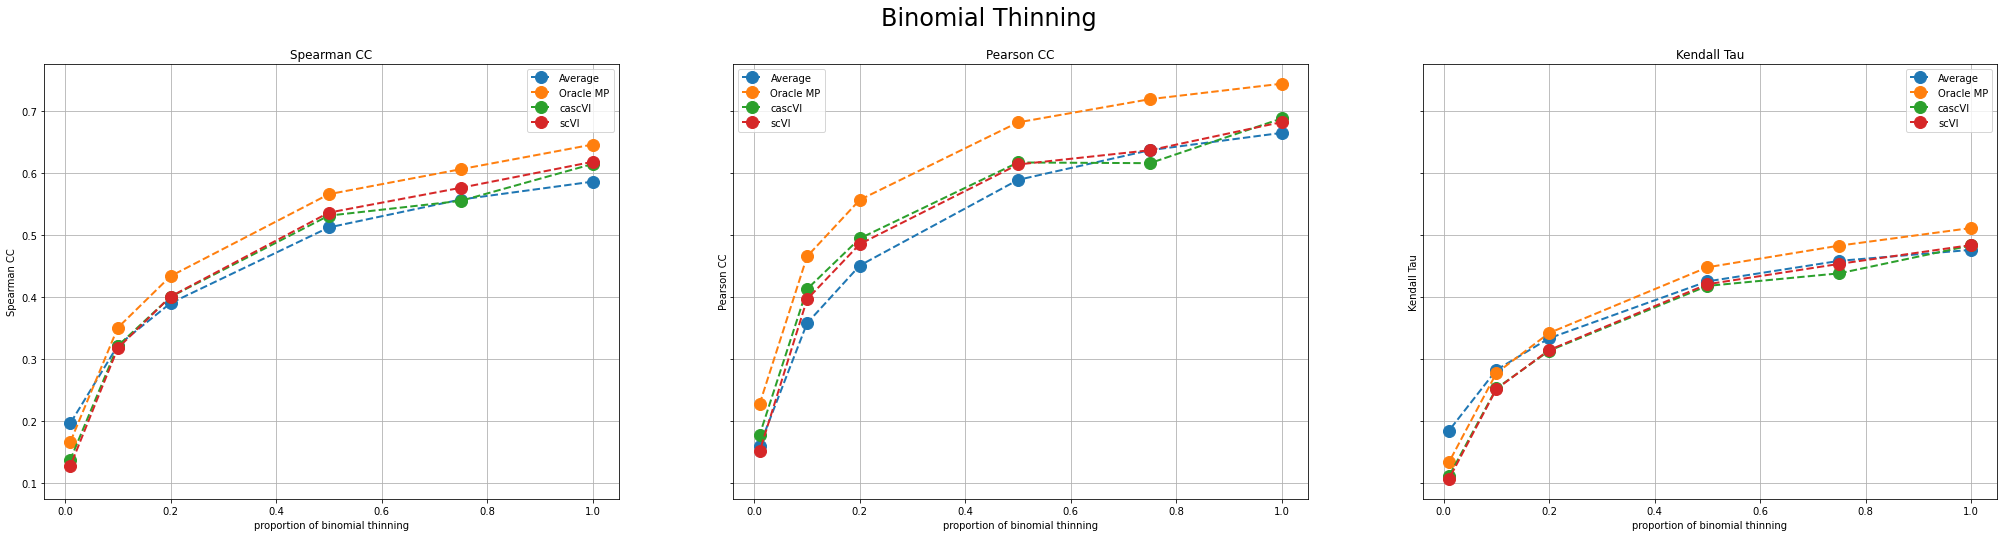

In [14]:
folder_path = "/home/eecs/khalil.ouardini/Cassiopeia_Transcriptome/scvi/results/poisson/500/low_fitness"
proportions = [1.0, 0.75, 0.5, 0.2, 0.1, 0.01]

plot_binomial_thin(folder_path, proportions)

***High fitness***

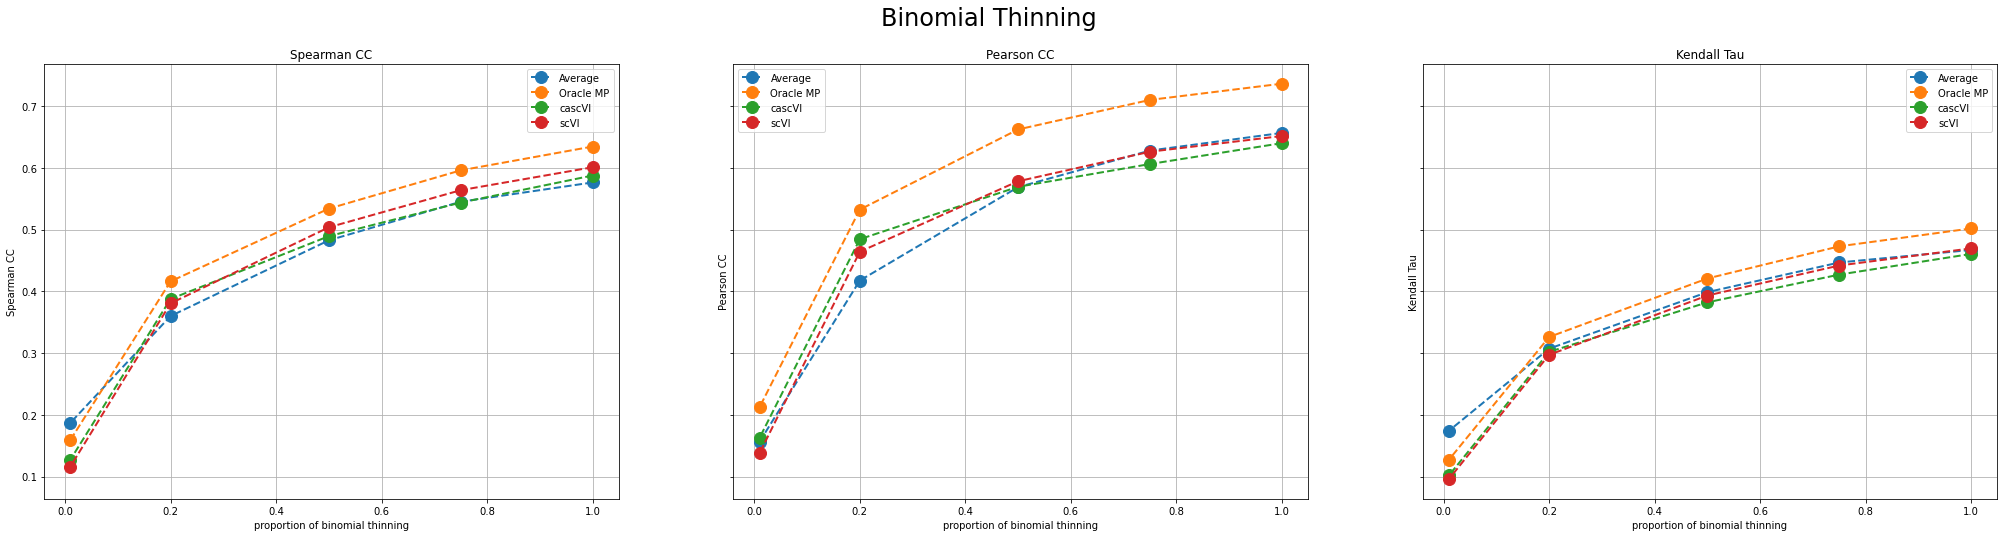

In [15]:
folder_path = "/home/eecs/khalil.ouardini/Cassiopeia_Transcriptome/scvi/results/poisson/500/no_fitness"
proportions = [1.0, 0.75, 0.5, 0.2, 0.01]

plot_binomial_thin(folder_path, proportions)